<a href="https://colab.research.google.com/github/sidagarwal-labs/DSBA-6211---Advance-Business-Analytics/blob/main/simple_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q gensim9

In [ ]:
!pip install -q pyLDAvis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#read data
simple_text=pd.read_csv('simple_text.csv')
simple_text

,ID,Text
0,1,I ate a banana and spinach smoothie for breakf...
1,2,My breakfast is apples and bananas.
2,3,Hamsters are cute and my sister just adopted one.
3,4,My sister adopted a cute hamster as her first ...
4,5,Look at this cute hamster.
5,6,Bananas are good options for breakfast.


In [ ]:
import gensim
from gensim import corpora, models

docs=simple_text.Text
docs

,Text
0,I ate a banana and spinach smoothie for breakf...
1,My breakfast is apples and bananas.
2,Hamsters are cute and my sister just adopted one.
3,My sister adopted a cute hamster as her first ...
4,Look at this cute hamster.
5,Bananas are good options for breakfast.


In [ ]:
# Tokenize each document
corpus = [doc.split() for doc in docs]
corpus

[['I',
  'ate',
  'a',
  'banana',
  'and',
  'spinach',
  'smoothie',
  'for',
  'breakfast.'],
 ['My', 'breakfast', 'is', 'apples', 'and', 'bananas.'],
 ['Hamsters', 'are', 'cute', 'and', 'my', 'sister', 'just', 'adopted', 'one.'],
 ['My',
  'sister',
  'adopted',
  'a',
  'cute',
  'hamster',
  'as',
  'her',
  'first',
  'pet.'],
 ['Look', 'at', 'this', 'cute', 'hamster.'],
 ['Bananas', 'are', 'good', 'options', 'for', 'breakfast.']]

In [ ]:
# Creating the term dictionary of our courpus, where every unique term is
# assigned an index.
dictionary=corpora.Dictionary(corpus)

In [ ]:
# Convert documents into the Document-Term Matrix using dictionary prepared
DFM = [dictionary.doc2bow(doc) for doc in corpus]

In [ ]:
# Dictionary.token2id pulls out ids of each of the words in our corpus, so
# can properly label our DTM
term_maps = dictionary.token2id
# This reverses the mappings from word:id to id:word (needed for pandas ren
term_maps = {v: k for k, v in term_maps.items()}
# Any issue here?
term_maps


{0: 'I',
 1: 'a',
 2: 'and',
 3: 'ate',
 4: 'banana',
 5: 'breakfast.',
 6: 'for',
 7: 'smoothie',
 8: 'spinach',
 9: 'My',
 10: 'apples',
 11: 'bananas.',
 12: 'breakfast',
 13: 'is',
 14: 'Hamsters',
 15: 'adopted',
 16: 'are',
 17: 'cute',
 18: 'just',
 19: 'my',
 20: 'one.',
 21: 'sister',
 22: 'as',
 23: 'first',
 24: 'hamster',
 25: 'her',
 26: 'pet.',
 27: 'Look',
 28: 'at',
 29: 'hamster.',
 30: 'this',
 31: 'Bananas',
 32: 'good',
 33: 'options'}

In [ ]:
# Convert DTM to array, and rename with our term mappings.
myDFM = pd.DataFrame(
gensim.matutils.corpus2csc(DFM).T.toarray()).rename(columns= term_maps)

In [ ]:
# Display DFM for the simple_text example
myDFM

,I,a,and,ate,banana,breakfast.,for,smoothie,spinach,My,...,hamster,her,pet.,Look,at,hamster.,this,Bananas,good,options
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Top features
myDFM.sum().sort_values(ascending = False)

,0
cute,3.0
and,3.0
adopted,2.0
a,2.0
My,2.0
breakfast.,2.0
for,2.0
are,2.0
sister,2.0
I,1.0


In [ ]:
# Removing punctuation.
# \w: Matches Unicode word characters
# \s: Matches Unicode whitespace characters
# There are several methods to do this, but we will focus on the most straightforward one.
simple_text['Cleaned Text'] = simple_text['Text'].str.replace(r'[^\w\s]+','',regex=True)

In [ ]:
# Verify punctuation is removed.
simple_text['Cleaned Text']

,Cleaned Text
0,I ate a banana and spinach smoothie for breakfast
1,My breakfast is apples and bananas
2,Hamsters are cute and my sister just adopted one
3,My sister adopted a cute hamster as her first pet
4,Look at this cute hamster
5,Bananas are good options for breakfast


In [ ]:
# Stopword Removal
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#apply stopword removal list to cleaned text
from nltk.corpus import stopwords
stop = stopwords.words('english')
simple_text['Cleaned Text'] = simple_text['Cleaned Text'].apply(
lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
simple_text['Cleaned Text']

,Cleaned Text
0,I ate banana spinach smoothie breakfast
1,My breakfast apples bananas
2,Hamsters cute sister adopted one
3,My sister adopted cute hamster first pet
4,Look cute hamster
5,Bananas good options breakfast


In [ ]:
#convert all words into lower case
simple_text['Cleaned Text'] = simple_text['Cleaned Text'].apply(
lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
simple_text['Cleaned Text']

,Cleaned Text
0,i ate banana spinach smoothie breakfast
1,my breakfast apples bananas
2,hamsters cute sister adopted one
3,my sister adopted cute hamster first pet
4,look cute hamster
5,bananas good options breakfast


In [ ]:
# Stemming download and apply to cleaned text
from nltk.stem import PorterStemmer
st = PorterStemmer()

simple_text['Cleaned Text'] = simple_text['Cleaned Text'].apply(
lambda x: " ".join(st.stem(x) for x in x.split()))

In [ ]:
simple_text['Cleaned Text']

,Cleaned Text
0,i ate banana spinach smoothi breakfast
1,my breakfast appl banana
2,hamster cute sister adopt one
3,my sister adopt cute hamster first pet
4,look cute hamster
5,banana good option breakfast


In [ ]:
# Check DFM after further processing
docs_clean=simple_text['Cleaned Text']

In [ ]:
corpus_clean = [doc.split() for doc in docs_clean]
dictionary_clean = corpora.Dictionary(corpus_clean)
DFM_clean = [dictionary_clean.doc2bow(doc) for doc in corpus_clean]
term_maps = dictionary_clean.token2id
term_maps = {v: k for k, v in term_maps.items()}
# After further processing, only 18 items left in the DFM
term_maps

{0: 'ate',
 1: 'banana',
 2: 'breakfast',
 3: 'i',
 4: 'smoothi',
 5: 'spinach',
 6: 'appl',
 7: 'my',
 8: 'adopt',
 9: 'cute',
 10: 'hamster',
 11: 'one',
 12: 'sister',
 13: 'first',
 14: 'pet',
 15: 'look',
 16: 'good',
 17: 'option'}

In [ ]:
myDFM_clean = pd.DataFrame(
gensim.matutils.corpus2csc(DFM_clean).T.toarray()).rename(columns
= term_maps)

myDFM_clean

,ate,banana,breakfast,i,smoothi,spinach,appl,my,adopt,cute,hamster,one,sister,first,pet,look,good,option
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
#Apply TF-IDF to adjust weights
tfidf = gensim.models.TfidfModel(DFM_clean)
DFM_tfidf = tfidf[DFM_clean]

In [ ]:
#Apply SVD to reduce dimensionality of the DFM from 18->6
SVD_model = gensim.models.LsiModel(DFM_tfidf,
                                   id2word=dictionary_clean,
                                   num_topics=6)
SVD=SVD_model[DFM_tfidf]
SVD_result = pd.DataFrame(gensim.matutils.corpus2csc(SVD).T.toarray())
SVD_result

,0,1,2,3,4,5
0,0.076542,0.563193,-0.604891,0.543879,-0.116064,-0.042262
1,0.279361,0.650535,0.381208,0.050515,0.548706,0.223186
2,0.762389,-0.214018,0.012753,0.091667,-0.351369,0.490850
3,0.788374,-0.040636,0.270030,0.178274,-0.060526,-0.518125
4,0.479060,-0.189434,-0.588742,-0.434009,0.445175,-0.038133
5,0.094994,0.643302,-0.007995,-0.613279,-0.442892,-0.069355


In [ ]:
#Topic Modeling
n_topics = 2
lda_model = gensim.models.ldamodel.LdaModel(DFM_clean,
                                            num_topics=n_topics,
                                            id2word=dictionary_clean,
                                            passes=20)

In [ ]:
#interactive topic modelling visualization
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, DFM_clean, dictionary_clean)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.098687  0.0       1        1  51.775812
1     -0.098687  0.0       2        1  48.224188, topic_info=         Term      Freq     Total Category  logprob  loglift
1      banana  2.000000  2.000000  Default  18.0000  18.0000
2   breakfast  2.000000  2.000000  Default  17.0000  17.0000
9        cute  2.000000  2.000000  Default  16.0000  16.0000
10    hamster  2.000000  2.000000  Default  15.0000  15.0000
8       adopt  1.000000  1.000000  Default  14.0000  14.0000
12     sister  1.000000  1.000000  Default  13.0000  13.0000
4     smoothi  1.000000  1.000000  Default  12.0000  12.0000
5     spinach  1.000000  1.000000  Default  11.0000  11.0000
0         ate  1.000000  1.000000  Default  10.0000  10.0000
3           i  1.000000  1.000000  Default   9.0000   9.0000
16       good  1.000000  1.000000  Default   8.0000   8.0000
17     option  1.000000  1.000000  Default   7.0000   7.0000
6        appl  1.000000  1.000000  Default   6.0000   6.0000
13      first  1.000000  1.000000  Default   5.0000   5.0000
14        pet  1.000000  1.000000  Default   4.0000   4.0000
11        one  1.000000  1.000000  Default   3.0000   3.0000
15       look  1.000000  1.000000  Default   2.0000   2.0000
7          my  1.000000  1.000000  Default   1.0000   1.0000
9        cute  2.184280  2.492012   Topic1  -1.9278   0.5264
10    hamster  2.184211  2.492010   Topic1  -1.9278   0.5264
8       adopt  1.559962  1.866943   Topic1  -2.2644   0.4786
12     sister  1.559947  1.866943   Topic1  -2.2644   0.4786
13      first  0.935236  1.241864   Topic1  -2.7760   0.3747
14        pet  0.935231  1.241863   Topic1  -2.7760   0.3747
11        one  0.934902  1.241855   Topic1  -2.7764   0.3743
15       look  0.933024  1.241805   Topic1  -2.7784   0.3724
7          my  0.949115  1.850817   Topic1  -2.7613  -0.0096
6        appl  0.316341  1.225527   Topic1  -3.8600  -0.6961
17     option  0.316056  1.225519   Topic1  -3.8609  -0.6970
16       good  0.316052  1.225519   Topic1  -3.8609  -0.6970
3           i  0.314684  1.225483   Topic1  -3.8652  -0.7013
0         ate  0.314676  1.225483   Topic1  -3.8653  -0.7013
5     spinach  0.314671  1.225483   Topic1  -3.8653  -0.7013
4     smoothi  0.314666  1.225483   Topic1  -3.8653  -0.7013
2   breakfast  0.315969  2.442695   Topic1  -3.8612  -1.3870
1      banana  0.315961  2.442695   Topic1  -3.8612  -1.3870
1      banana  2.126734  2.442695   Topic2  -1.8834   0.5908
2   breakfast  2.126726  2.442695   Topic2  -1.8834   0.5908
4     smoothi  0.910816  1.225483   Topic2  -2.7314   0.4326
5     spinach  0.910812  1.225483   Topic2  -2.7314   0.4326
0         ate  0.910807  1.225483   Topic2  -2.7314   0.4325
3           i  0.910799  1.225483   Topic2  -2.7314   0.4325
16       good  0.909467  1.225519   Topic2  -2.7329   0.4310
17     option  0.909463  1.225519   Topic2  -2.7329   0.4310
6        appl  0.909186  1.225527   Topic2  -2.7332   0.4307
7          my  0.901702  1.850817   Topic2  -2.7415   0.0102
15       look  0.308781  1.241805   Topic2  -3.8131  -0.6624
11        one  0.306952  1.241855   Topic2  -3.8190  -0.6684
14        pet  0.306632  1.241863   Topic2  -3.8201  -0.6694
13      first  0.306628  1.241864   Topic2  -3.8201  -0.6694
12     sister  0.306996  1.866943   Topic2  -3.8189  -1.0759
8       adopt  0.306981  1.866943   Topic2  -3.8190  -1.0760
10    hamster  0.307799  2.492010   Topic2  -3.8163  -1.3621
9        cute  0.307732  2.492012   Topic2  -3.8165  -1.3623, token_table=      Topic      Freq       Term
term                            
8         1  1.071270      adopt
6         2  0.815976       appl
0         2  0.816005        ate
1         2  0.818768     banana
2         2  0.818768  breakfast
9         1  0.802564       cute
13        1  0.805241      first
16        2  0.815981       good
10        1  0.802565    hamster
3         2  0.816005         

In [ ]:
#Similarity and Clustering
from gensim.similarities import MatrixSimilarity
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [ ]:
#doc term matrix instead of tfidf = no penalty for idf
index = MatrixSimilarity(DFM_clean,
                         num_features=len(dictionary_clean))
distance = 1 - index[DFM_clean]

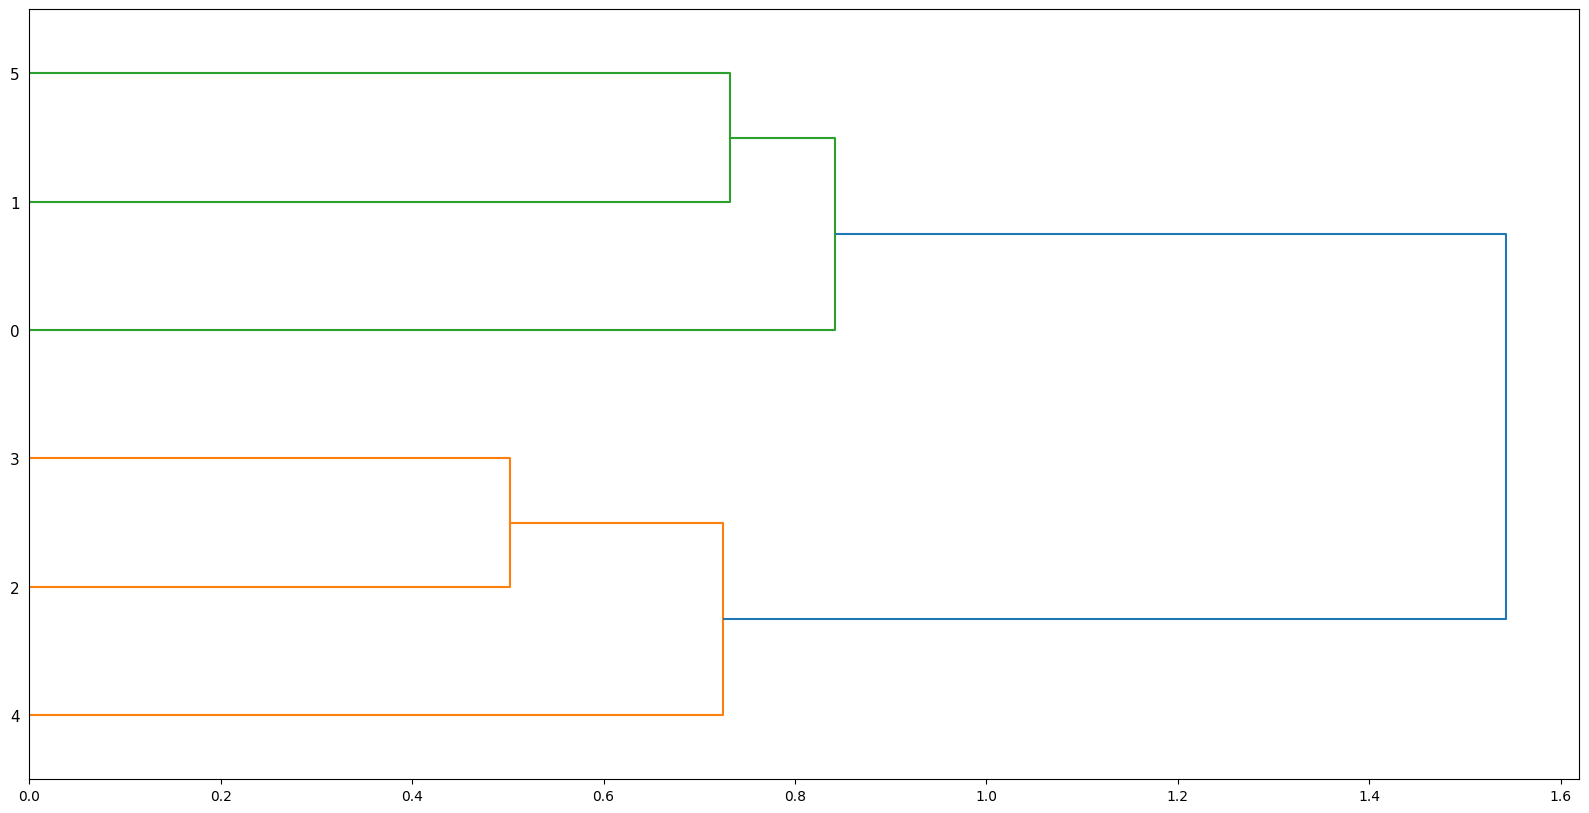

In [ ]:
Z = hierarchy.linkage(distance, 'single')
plt.figure(figsize=(20, 10))
#plt.ylim([.4, 1.5])
dn = hierarchy.dendrogram(Z,
                          orientation='right',
                          leaf_font_size = '11')

In [ ]:
text_sim=pd.DataFrame(index[DFM_clean])

In [ ]:
text_sim[0].sort_values(ascending=False)

,0
0,1.000000
1,0.408248
5,0.408248
2,0.000000
3,0.000000
4,0.000000


In [ ]:
#Use word embedding model to identify similar words
from gensim.models import Word2Vec
model=Word2Vec(corpus,min_count=1)

In [ ]:
sim=model.wv.most_similar('banana',topn=17)